![logo](../../../LogoLine_horizon_C3S.png)

# Evaluation of the Arctic sea ice thickness in the CMIP6 historical experiments

Production date: 2024-05-31

Produced by: Timothy Williams, Nansen Environmental and Remote Sensing Center (NERSC)

## 🌍 Use case: Scientific assessment of Arctic sea ice thickness in CMIP6 to inform product creation

## ❓ Quality assessment question
**- How well does the Arctic sea ice thickness in the CMIP6 historical experiments compare to sea ice thickness estimates from altimetry?**

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
- On average the Arctic sea ice thickness (SIT) from the CMIP6 ensemble is fairly unbiased against the altimeter-based estimates, with the exception of October. However the bias starts to become negative towards the end of the historical experiment in 2013 and 2014.

- There are some spatial differences between the CMIP6 models and their ensemble mean. This is shown by the RMSE staying relatively constant throughout the whole evaluation period despite the low bias, indicating that the spatial biases are cancelling each other out. It is also shown by spatial maps of climatologies of the bias, which show that in the ENVISAT period the Beaufort Sea has a strong positive bias, while the Laptev, Kara and Barents Seas have more of a negative bias. In the CryoSat-2 period, the spatial distribution of the bias changes with the Beafort, Laptev, Kara and Barents Seas all have a positive bias, while the Greenland Sea, and the area extending from the north of Greenland to the north pole have a strong negative bias, making the mean bias negative.

- We also compared maps of the climatology of the ensemble mean of the CMIP6 models during the CryoSat-2 period (2010-2020) to the climatology of the ensemble mean in the ENVISAT period (2002-2010). Spatially, the CMIP6 model mean has a fairly uniform drop in thickness when we move from the earlier satellite period to the later one, while the difference in the altimeter climatologies is more variable spatially.

- Other authors have also looked at evaluating CMIP6 models sea ice thickness or volume. [West & Blockley (2024)](https://doi.org/10.5194/gmd-2024-121) compared a subset of the models (those that output heat flux diagnostics) to ice mass-balance buoys, finding that the CMIP6 models they looked at overestimated heat fluxes and thus sea ice melt and growth. A number of authors ([Davy & Outten, 2020](https://doi.org/10.1175/JCLI-D-19-0990.1);  [Xu et al. , 2023](https://doi.org/10.3389/fmars.2023.1223772); [Watts et al. 2021](https://doi.org/10.1175/JCLI-D-20-0491.1)) found that the CMIP6 ensemble mean was similar to the PIOMAS (Pan-Arctic Ice-Ocean Modeling and Assimilation System) reanalysis, although the spread was quite large. [Davy & Outten (2020)](https://doi.org/10.1175/JCLI-D-19-0990.1) also included CMIP5 models in their comparison, noting that both the bias and spread have improved in CMIP6. The spatial patterns in the differences between altimeter and the CMIP6 ensemble mean that we found have also been found by others ([Watts et al., 2021](https://doi.org/10.1175/JCLI-D-20-0491.1); [Henke et al (2023)](https://doi.org/10.1080/15230430.2023.2271592)). In addition, [Kuang et al (2024)](https://doi.org/10.1016/j.accre.2024.06.008) calculated sea ice volume fluxes through six Arctic gateways (the most important being the Fram Strait), finding the multi-model mean also gave a reasonable representation of this flux.

- A number of authors have also used CMIP6 sea ice thickness and volume when considering projections of sea ice. An interesting example of this is the article by [Zhou et al (2022)](https://doi.org/10.1088/1748-9326/ac9d4d), who found that subsetting the CMIP6 models according to how two thickness-based quantities (mean April SIT and the response of the minimum sea ice area to the mean April SIT) compared to the PIOMAS values substantially reduced the spread in projected sea ice extent and when the Arctic Ocean might become ice-free (depending on the warming scenario).
```

## 📋 Methodology
For our ensemble we include each model in the CMIP6 historical experiment that outputs sea ice thickness, although users should note that choosing a different subset of models could give different results.
Then, for each model in our ensemble, we calculate time series of bias and RMSE for the models compared to sea ice thickness estimates from altimetry - from the ENVISAT product between 2002 and April 2010, and from the CryoSat-2 product after October 2010. We then make plots of the time series showing the median and interquartile limits of the CMIP6 ensemble. There is a separate notebook which looks at these satellite products and addresses whether temporal trends can be seen in these data themselves.

We also calculate monthly thickness climatologies for the ENVISAT period and the CryoSat-2 period, and plot them to compare the spatial distribution of the thickness fields and the biases.

Finally we calculate the difference between the climatologies for the CryoSat-2 and ENVISAT periods, to compare the change in thickness over time for the model and the satellites.

The "Analysis and results" section is organised as follows:

**[](climate_projections-cmip6_model-performance_q03:section-1)**

**[](climate_projections-cmip6_model-performance_q03:section-2)**

**[](climate_projections-cmip6_model-performance_q03:section-3)**

&nbsp; &nbsp; &nbsp; &nbsp; **[](climate_projections-cmip6_model-performance_q03:section-3.1)**

&nbsp; &nbsp; &nbsp; &nbsp; Plot time series of the error metrics.
  
&nbsp; &nbsp; &nbsp; &nbsp; **[](climate_projections-cmip6_model-performance_q03:section-3.2)**

&nbsp; &nbsp; &nbsp; &nbsp; Plot maps of climatologies and their biases for each winter month (October-April).

&nbsp; &nbsp; &nbsp; &nbsp; **[](climate_projections-cmip6_model-performance_q03:section-3.3)**

&nbsp; &nbsp; &nbsp; &nbsp; Compare the change in thickness moving from the ENVISAT period to the CryoSat-2 period for both the satellites and the CMIP6 ensemble mean.

## 📈 Analysis and results

(climate_projections-cmip6_model-performance_q03:section-1)=
### 1. Import libraries, set parameters and definitions of functions
This section defines some functions used in the analysis and visualisation. 

#### 1.1 Import libraries
Import the required libraries, including the EQC toolbox.

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np
from c3s_eqc_automatic_quality_control import diagnostics, download, plot
import calendar
import cartopy.crs as ccrs
from cmocean import cm

plt.style.use("seaborn-v0_8-notebook")
warnings.filterwarnings("ignore", module="cf_xarray")
warnings.filterwarnings("ignore", module="numpy")

#### 1.2 Set parameters
- Set the time period to be analysed with `year_start` and `year_stop`.
- Set the models to be evaluated with the list `models`.

In [2]:
year_start = 2002
year_stop = 2014
assert year_start >= 2002 and year_stop <= 2014

# Choose CMIP6 historical models
models = [
    "access_cm2",
    "access_esm1_5",
    "canesm5",
    "cmcc_cm2_sr5",
    "cmcc_esm2",
    "cnrm_cm6_1",
    "cnrm_cm6_1_hr",
    "cnrm_esm2_1",
    "e3sm_1_0",
    "e3sm_1_1",
    "e3sm_1_1_eca",
    "ec_earth3_aerchem",
    "ec_earth3_cc",
    "ec_earth3_veg_lr",
    "hadgem3_gc31_ll",
    "ipsl_cm5a2_inca",
    "ipsl_cm6a_lr",
    "miroc6",
    "miroc_es2l",
    "mpi_esm1_2_hr",
    "mpi_esm1_2_lr",
    "nesm3",
    "norcpm1",
    # "taiesm1", # very high values
    "ukesm1_0_ll",
]

#### 1.3 Define requests for CDS data
Define the download requests in the format needed by the EQC toolbox.

In [3]:
months = [f"{month:02d}" for month in [1, 2, 3, 4, 10, 11, 12]]
years = [str(year) for year in range(year_start, year_stop + 1)]

collection_id_cmip6 = "projections-cmip6"
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "monthly",
    "experiment": "historical",
    "variable": "sea_ice_thickness",
    "month": months,
}

year_ranges = {
    "envisat": range(max(2002, year_start), min(2010, year_stop) + 1),
    "cryosat_2": range(max(2010, year_start), min(2020, year_stop) + 1),
}
collection_id_satellite = "satellite-sea-ice-thickness"
request_satellite = {
    "version": "2_0",
    "cdr_type": "cdr",
    "variable": "all",
    "month": months,
}

chunks = {"year": 1}

projection_satellite = ccrs.Stereographic(central_latitude=90)

#### 1.4 Functions to create the time series

These functions are all applied to a single CMIP6 model. They are all applied to the downloaded data before caching.
- `get_satellite_data` downloads the monthly satellite data.
- `regrid` interpolates the model to the satellite grid.
- `get_monthly_interpolated_data` is applied to both the model and satellite data, to take the monthly mean (the satellite data is daily, but this also forces all the models to have the same time coordinate) and interpolate to the satellite grid (only for model data). It also calculates the RMS error (only for satellite data).
- `compare_model_vs_satellite` compares the sea ice thickness from a single CMIP6 model with satellite estimates, calculating error metrics like bias and RMSE in thickness.
- `compute_sea_ice_thickness_diagnostics` downloads the satellite and model data and calls `compare_model_vs_satellite` to get a time series of error metrics.

In [4]:
def get_satellite_data(time):
    year_start = time.dt.year.min().values
    year_stop = time.dt.year.max().values

    year_ranges = {
        "envisat": range(max(2002, year_start), min(2010, year_stop) + 1),
        "cryosat_2": range(max(2010, year_start), min(2020, year_stop) + 1),
    }

    datasets = []
    for satellite, year_range in year_ranges.items():
        if not year_range:
            continue
        ds = download.download_and_transform(
            "satellite-sea-ice-thickness",
            {
                "satellite": satellite,
                "version": "2_0",
                "cdr_type": "cdr",
                "variable": "all",
                "year": list(map(str, year_range)),
                "month": [f"{month:02d}" for month in [1, 2, 3, 4, 10, 11, 12]],
            },
            chunks={"year": 1},
        )
        datasets.append(ds)
    return xr.concat(datasets, "time")


def regrid(obj, grid_out, **regrid_kwargs):
    # Remove nan columns
    for dim in [dim for dim in obj.dims if "x" in dim or "lon" in dim]:
        for i in (0, -1):
            if obj.isel({dim: i}).isnull().all():
                obj = obj.drop_isel({dim: i})
    return diagnostics.regrid(obj, grid_out, **regrid_kwargs)


def compare_model_vs_satellite(ds, ds_satellite):
    # Homogenize time
    ds = ds.convert_calendar("standard", align_on="date")
    ds["time"] = pd.to_datetime(ds["time"].dt.strftime("%Y-%m"))
    ds_satellite = ds_satellite.convert_calendar("standard", align_on="date")

    # Get variables
    dims = ("xc", "yc")
    std_name = "sea_ice_thickness"
    sit = ds.cf[std_name]
    sit_obs = ds_satellite.cf[std_name]
    sit_obs_err = ds_satellite.cf[f"{std_name} standard_error"]
    sit_model = sit.sel(time=sit_obs["time"])

    # Compute useful variables
    sit_diff = sit_model - sit_obs

    # Compute output
    dataarrays = {}
    dataarrays["sithick_bias"] = sit_diff.mean(dim=dims)
    dataarrays["sithick_bias"].attrs = {
        "standard_name": "sea_ice_thickness_bias",
        "units": "m",
        "long_name": "Sea ice thickness bias",
    }

    dataarrays["sithick_rmse"] = (sit_diff ** 2).mean(dim=dims) ** (1 / 2)
    dataarrays["sithick_rmse"].attrs = {
        "standard_name": "sea_ice_thickness_rmse",
        "units": "m",
        "long_name": "Sea ice thickness root mean square error",
    }

    dataarrays["rms_sit_obs_error"] = (sit_obs_err ** 2).mean(dim=dims) ** (1 / 2)
    dataarrays["rms_sit_obs_error"].attrs = {
        "standard_name": "root_mean_square_sea_ice_thickness_observation_error",
        "units": "m",
        "long_name": "Root mean square sea ice thickness observation error",
    }

    return xr.Dataset(dataarrays)


def compute_sea_ice_thickness_diagnostics(ds, **regrid_kwargs):
    ds_satellite = get_satellite_data(ds["time"])
    ds = regrid(ds, ds_satellite[["latitude", "longitude"]], **regrid_kwargs)
    return compare_model_vs_satellite(ds, ds_satellite)

#### 1.5 Function to plot error time series
- `plot_error_time_series` plots the spread of the model errors (compared to the observed sea ice concentration), and also the root mean square observation error for comparison.

In [5]:
def plot_error_time_series(ds_cmip6):
    err_name = "rms_sit_obs_error"
    rms_error = (ds_cmip6[err_name]
                 .mean(dim="model") # independent of model
                 .resample(time="1MS").mean() # fills summer months with NaN
                )
    ds_quantiles = (ds_cmip6
                    .drop_vars([err_name])
                    .resample(time="1MS").mean() # fills summer months with NaN
                    .quantile([1 / 4, 1 / 2, 3 / 4], dim="model", keep_attrs=True)
                   )
    fig, axs = plt.subplots(len(ds_quantiles.data_vars), 1, sharex=True)
    
    for (var, da), ax in zip(ds_quantiles.data_vars.items(), axs.flatten()):
        # da = da.resample(time="1MS").mean()
        da.sel(quantile=1 / 2).drop_vars("quantile").plot(ax=ax, label="median")
        ax.fill_between(
            da["time"],
            da.sel(quantile=1 / 4),
            da.sel(quantile=3 / 4),
            alpha=0.5,
            label="IQL",
        )
        ylim = list(ax.get_ylim())
        if "bias" in var:
            ax.fill_between(
                rms_error["time"],
                - rms_error,
                rms_error,
                alpha=0.25,
                label="Obs. error",
                color='gray'
            )
        else:
            ax.fill_between(
                rms_error["time"],
                rms_error,
                np.sqrt(2) * rms_error, # test if model error is <= obs error
                alpha=0.25,
                label="Obs. error",
                color='gray'
            )
            ylim[0] -= .15
            ax.set_ylim(ylim)
        # mark approximate time when CryoSat-2 becomes available
        t_cs2 = pd.Timestamp(2010,7,1)
        ax.plot([t_cs2, t_cs2], ylim, '--r')
        ax.legend()
        ax.grid()

#### 1.6 Functions to create climatologies for plotting
- `regridded_monthly_weighted_mean` gets monthly climatologies and then regrids them to the satellite grid. This is applied to the downloaded data before caching.
- `postprocess_map_datasets` is applied after loading the cached data to rename some variables and dimensions in order to make them easier to use and plot.

In [6]:
def regridded_monthly_weighted_mean(ds, times, **kwargs):
    # get monthly climatology
    ds["time"] = pd.to_datetime(ds["time"].dt.strftime("%Y-%m"))
    ds["time"].attrs["standard_name"] = "time"
    ds = ds.sel(time=times)
    ds = diagnostics.monthly_weighted_mean(ds)
    # get satellite grid
    ds_sat = download.download_and_transform(
        "satellite-sea-ice-thickness",
        {
            "satellite": "envisat",
            "version": "2_0",
            "cdr_type": "cdr",
            "variable": "all",
            "year": "2002",
            "month": [f"{month:02d}" for month in [1, 2, 3, 4, 10, 11, 12]],
        },
        chunks={"year": 1},
    )
    # interpolate the model data onto the satellite grid
    return diagnostics.regrid(ds, ds_sat[["latitude", "longitude"]], **kwargs)

def postprocess_map_datasets(ds_satellite, ds_cmip6):
    keep = ["longitude", "latitude", "sithick"]
    da_satellite = ds_satellite.rename_vars({"sea_ice_thickness": "sithick"})["sithick"]
    da_cmip6 = xr.where(ds_cmip6["sithick"] > 0, ds_cmip6["sithick"], np.nan)
    da = xr.concat([da_satellite, da_cmip6], "product")

    # reorder months
    month_inds = [4,5,6,0,1,2,3]
    da["month"] = [calendar.month_abbr[month] for month in da["month"].values[month_inds]]
    da.values = da.values[:,:,month_inds,:,:]

    # zoom in
    ix0 = 69
    sx = slice(ix0, ix0 + 294)
    iy0 = 60
    sy = slice(ix0, ix0 + 312)
    da = da[:,:,:,sy,sx]

    return da

#### 1.7 Functions to plot climatologies
- `plot_maps` plots a general climatology.
- `plot_sithick_maps` plots thickness climatologies.
- `plot_bias_maps` plots differences between the climatologies of the satellites and the CMIP6 ensemble mean.
- `plot_change_maps` plots the difference between a climatology for the Cryosat-2 period (2010-2014) and the Envisat period (2002-2010).

In [7]:
def plot_maps(da, title=None, pad=.095, **kwargs):
    facet_grid = plot.projected_map(
        da, **kwargs,
        robust=True,
        cbar_kwargs={'pad': pad, 'shrink': .35},
    )
    facet_grid.set_titles(template="{value}")
    facet_grid.fig.suptitle(title, y=1.011, x=.4)


def plot_sithick_maps(da, projection, satellite, **kwargs):
    sit = da.sel(satellite=satellite)
    sit["product"] = [{"envisat": "ENVISAT", "cryosat_2": "CryoSat-2"}[satellite], "CMIP6"]
    plot_maps(
        sit,
        col="product",
        row="month",
        projection=projection,
        **kwargs,
    )


def plot_bias_maps(da, projection, **kwargs):
    bias = da.sel(product="cmip6") - da.sel(product="satellite")
    bias.attrs = {
        "long_name": f"Bias in s{da.attrs['long_name'][1:]}",
        "standard_name": f"bias_in_{da.attrs['standard_name']}",
        "units": da.attrs["units"],
    }
    plot_maps(
        bias,
        row="month",
        projection=projection,
        vmin=-1,
        vmax=1,
        cmap=cm.balance,
        pad=.125,
        **kwargs,
    )


def plot_change_maps(da, projection, **kwargs):
    change = da.sel(satellite="cryosat_2") - da.sel(satellite="envisat")
    change.attrs = {
        "long_name": f"Change in s{da.attrs['long_name'][1:]}",
        "standard_name": f"change_in_{da.attrs['standard_name']}",
        "units": da.attrs["units"],
    }
    change["product"] = ["Satellite", "CMIP6"]
    plot_maps(
        change,
        col="product",
        row="month",
        projection=projection,
        vmin=-.5,
        vmax=.5,
        cmap=cm.balance,
        **kwargs,
    )

(climate_projections-cmip6_model-performance_q03:section-2)=
### 2. Download and transform the data
We download and process the data to make the time series and climatologies.

#### 2.1 Create the time series
We loop over all the models we are considering and apply `compute_sea_ice_diagnostics` to create the time series of error metrics.

In [ ]:
# hide-output
datasets = []
for model in models:
    print(f"{model=}")
    ds = download.download_and_transform(
        collection_id_cmip6,
        request_cmip6 | {"model": model, "year":  years},
        chunks=chunks,
        transform_func=compute_sea_ice_thickness_diagnostics,
        transform_func_kwargs={
            "method": "nearest_s2d",
            "periodic": True,
            "ignore_degenerate": True,
        },
    )
    datasets.append(ds.expand_dims(model=["model"]).compute())
ds_cmip6 = xr.concat(datasets, "model")

#### 2.2 Create the climatologies
We first save monthly climatologies for the satellite data.
Then we loop over all the models we are considering and apply `regridded_monthly_weighted_mean` to create climatologies, before taking their ensemble mean.

In [ ]:
# hide-output
datasets_satellite = []
datasets_cmip6 = []
for satellite, year_range in year_ranges.items():
    print(f"{satellite=}")
    years = list(map(str, year_range))
    ds = download.download_and_transform(
        collection_id_satellite,
        request_satellite | {"satellite": satellite, "year": years},
        chunks=chunks,
    )
    times = ds["time"].dt.strftime("%Y-%m").values.tolist()
    ds = diagnostics.monthly_weighted_mean(ds)
    datasets_satellite.append(
        ds.expand_dims(satellite=[satellite], product=["satellite"])
    )

    model_datasets = []
    for model in models:
        print(f"{model=}")
        ds = download.download_and_transform(
            collection_id_cmip6,
            request_cmip6 | {"model": model, "year": years},
            chunks=chunks,
            transform_chunks=False,
            transform_func=regridded_monthly_weighted_mean,
            transform_func_kwargs={
                "times": times,
                "method": "nearest_s2d",
                "periodic": True,
                "ignore_degenerate": True,
            },
        )
        model_datasets.append(
            ds.expand_dims(model=[model], satellite=[satellite], product=["cmip6"])
        )
    datasets_cmip6.append(
        xr.concat(model_datasets, "model").mean("model", keep_attrs=True)
    )

da_maps = postprocess_map_datasets(
    xr.concat(datasets_satellite, "satellite"),
    xr.concat(datasets_cmip6, "satellite"),
)
del(datasets_satellite, datasets_cmip6)

(climate_projections-cmip6_model-performance_q03:section-3)=
### 3. Results

(climate_projections-cmip6_model-performance_q03:section-3.1)=
#### 3.1 Time series of evaluation metrics
Below we plot time series of the bias and RMSE in the sea ice thickness of the CMIP6 models compared to the altimetry data.
We have taken an ensemble of models (all those that output sea ice thickness), interpolated them to the altimeter grid, and calculated time series of area-weighted error metrics for each model. We have then plotted the median and the inter-quartile limits for the ensemble for each metric. Also note that the altimeter data is only available in the winter months (October - April), which is why the time series have gaps. The vertical red lines (mid-2010) divide the ENVISAT period (2002-2010) from the CryoSat-2 one (2010-2020 for the CDR, but the historical CMIP6 experiments finish in 2014).

The bias in the models are generally about the same level as the observation error level ($\pm\sigma_{\rm obs}$, where $\sigma_{\rm obs}$ is the RMS error in the observations), and the ensemble median is close to zero for most of the time interval considered. Around 2014, however, the bias drops to about -0.25m compared to CryoSat-2.

Within each winter the bias is generally highest in October -  about 0.3m - 0.5m for ENVISAT and also in the 2011 winter. The intra-winter variability in the bias seems to reduce after this however.

It is worth remembering that ENVISAT has its own bias which has been estimated to be about -0.6m so the models are probably also underestimating the thickness by that amount in the ENVISAT period [(CDS SIT Quality Assessment Report)](https://dast.copernicus-climate.eu/documents/satellite-sea-ice-thickness/level-3/v3-0/WP2-FDDP-2022-09_C3S2-Lot3_PQAR-of-v3.0-SeaIceThickness-products_v3.2_Final.pdf). The bias in CryoSat-2 has been estimated to be about -0.11m [(CDS SIT Quality Assessment Report)](https://dast.copernicus-climate.eu/documents/satellite-sea-ice-thickness/level-3/v3-0/WP2-FDDP-2022-09_C3S2-Lot3_PQAR-of-v3.0-SeaIceThickness-products_v3.2_Final.pdf) so it is a little surprising that the model bias does not become negative immediately upon the change in satellite but instead stays around zero from 2010 to 2013. However, the validation data which was used to estimate the bias was limited in space to 3 or 4 drilling sites in the Beafort Sea and some airborne electromagnetic tracks in the Beafort Sea and north of Greenland [(CDS SIT Quality Assessment Report)](https://dast.copernicus-climate.eu/documents/satellite-sea-ice-thickness/level-3/v3-0/WP2-FDDP-2022-09_C3S2-Lot3_PQAR-of-v3.0-SeaIceThickness-products_v3.2_Final.pdf), so the satellite biases may not apply to the whole Arctic.

The RMSE is also relatively constant over the entire period and can be about 50% above the plotted error range which is taken to be $(\sigma_{\rm obs}, \sqrt{2}\sigma_{\rm obs})$. (This approximate error level comes from considering uncorrelated errors in the model and the observation time series when going through the calculation of the MSE - then the MSE is comparable to the error level if it is around $\sigma_{\rm obs}^2 + \sigma_{\rm mod}^2$, which becomes $2\sigma_{\rm obs}^2$ if we assume the model and observation errors are similar.) However in some years the median is near the error range and there is decent overlap between the IQL from the models and the error range. There is not such a clear intra-winter variability in this statistic as in the bias.

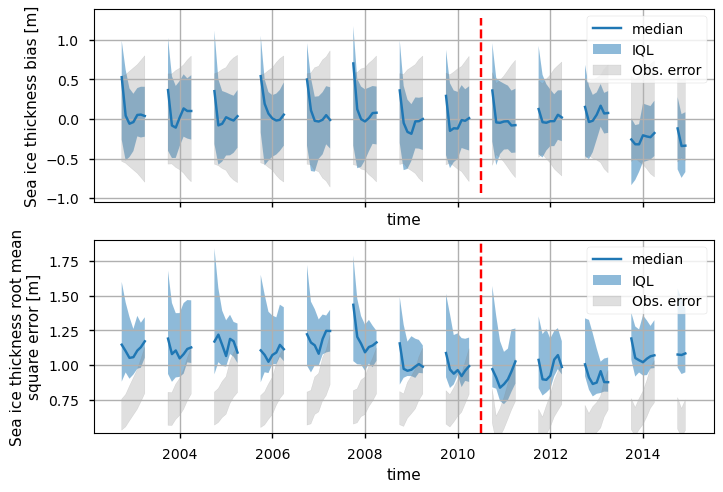

In [10]:
plot_error_time_series(ds_cmip6)

(climate_projections-cmip6_model-performance_q03:section-3.2)=
#### 3.2 Spatial distribution of errors
Below we plot monthly climatologies calculated from 2002 to 2010, of the thicknesses from ENVISAT and CMIP6 (the ensemble mean over all models), and the bias (model - observations) in the CMIP6 mean. The ice in the Canadian Archipelago is consistently very thick in the models for all months. In October there is a strong positive bias in the Beaufort sea, which, while present in all other months, is slightly reduced. This bias also extends spatially into the Siberian Sea for all months, although it is not as strong there. In the Eastern Arctic (the Laptev, Kara and Barents Seas), the Labrador Sea and Hudson Bay there are consistent negative biases. In the Greenland Sea the thickness is mostly negatively biased but in October there is a reasonably sized region of positive bias as well. In other months there is some positive bias there as well but the regions are smaller. Bear in mind, however, that considering such a dynamic region on a monthly time-scale may limit the conclusions that can be made about the Greenland Sea.

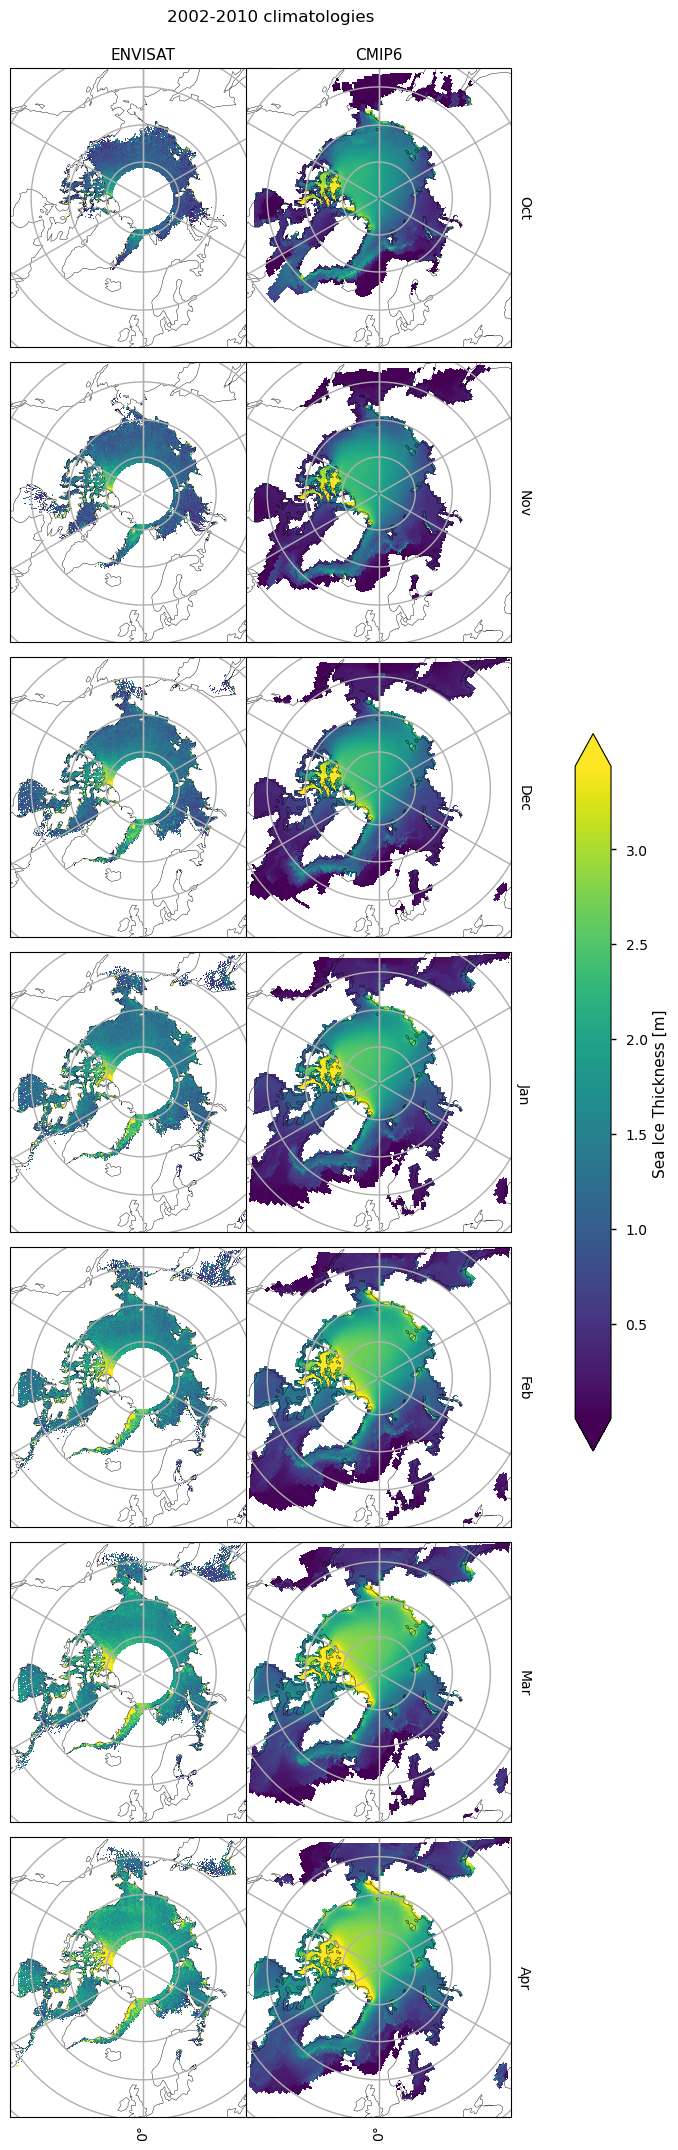

In [11]:
plot_sithick_maps(da_maps, projection_satellite, "envisat", title="2002-2010 climatologies")

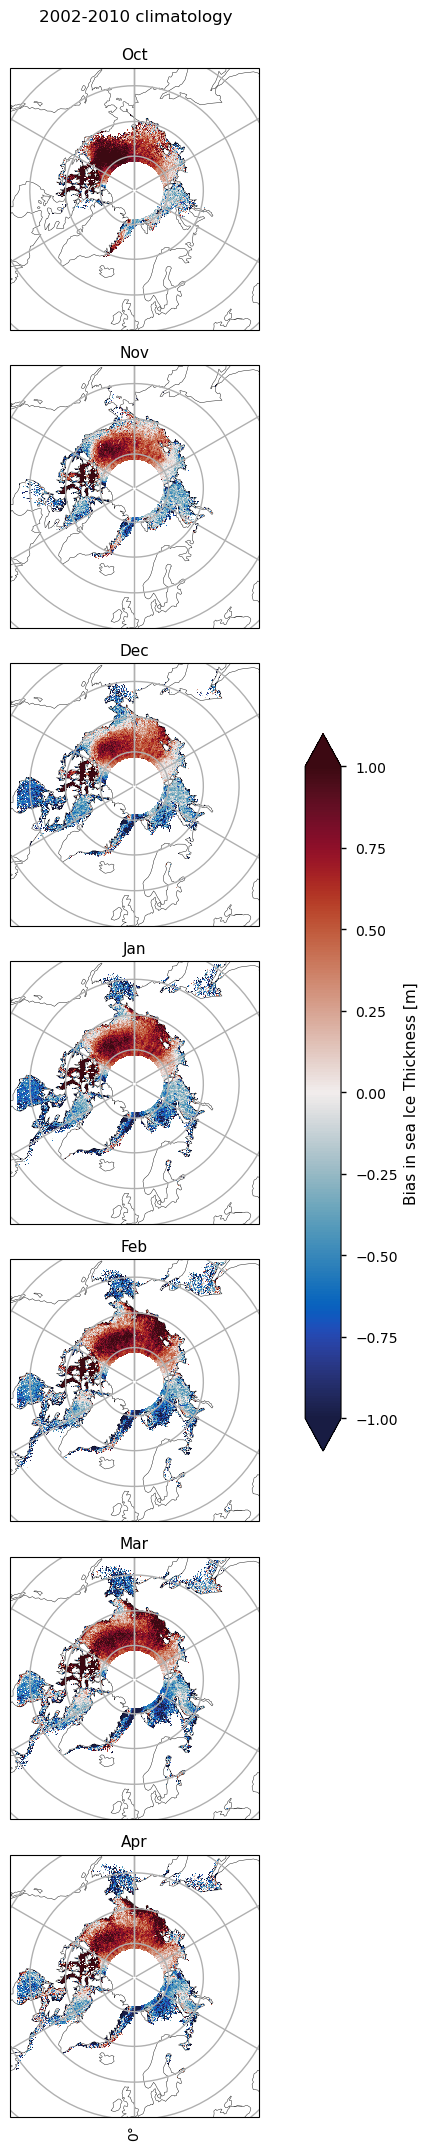

In [12]:
plot_bias_maps(da_maps.sel(satellite="envisat").squeeze(), projection_satellite, title="2002-2010 climatology")

Below we plot monthly climatologies calculated from 2010 to 2020, of the thicknesses from CryoSat-2 and CMIP6 (the ensemble mean over all models), and the bias (model - observations) in the CMIP6 mean. The ice in the Canadian Archipelago is still very thick in the models for all months. In October, there is a region of positive bias in the Beaufort, Siberian and Laptev seas. The extent of this region decreases as the months progress. There is a region of negative bias to the north of Greenland and the Canadian Archipelago, since the thicker ice off these coasts extends to the north pole in CryoSat-2 but is quite localised at the coasts in the models.

The ice in the Hudson Bay has a moderate negative bias, while the bias in the northern part of the Labrador Sea grows from around zero in November to about 25-50cm in April. Further south in the Labrador Sea there is a slight negative bias.

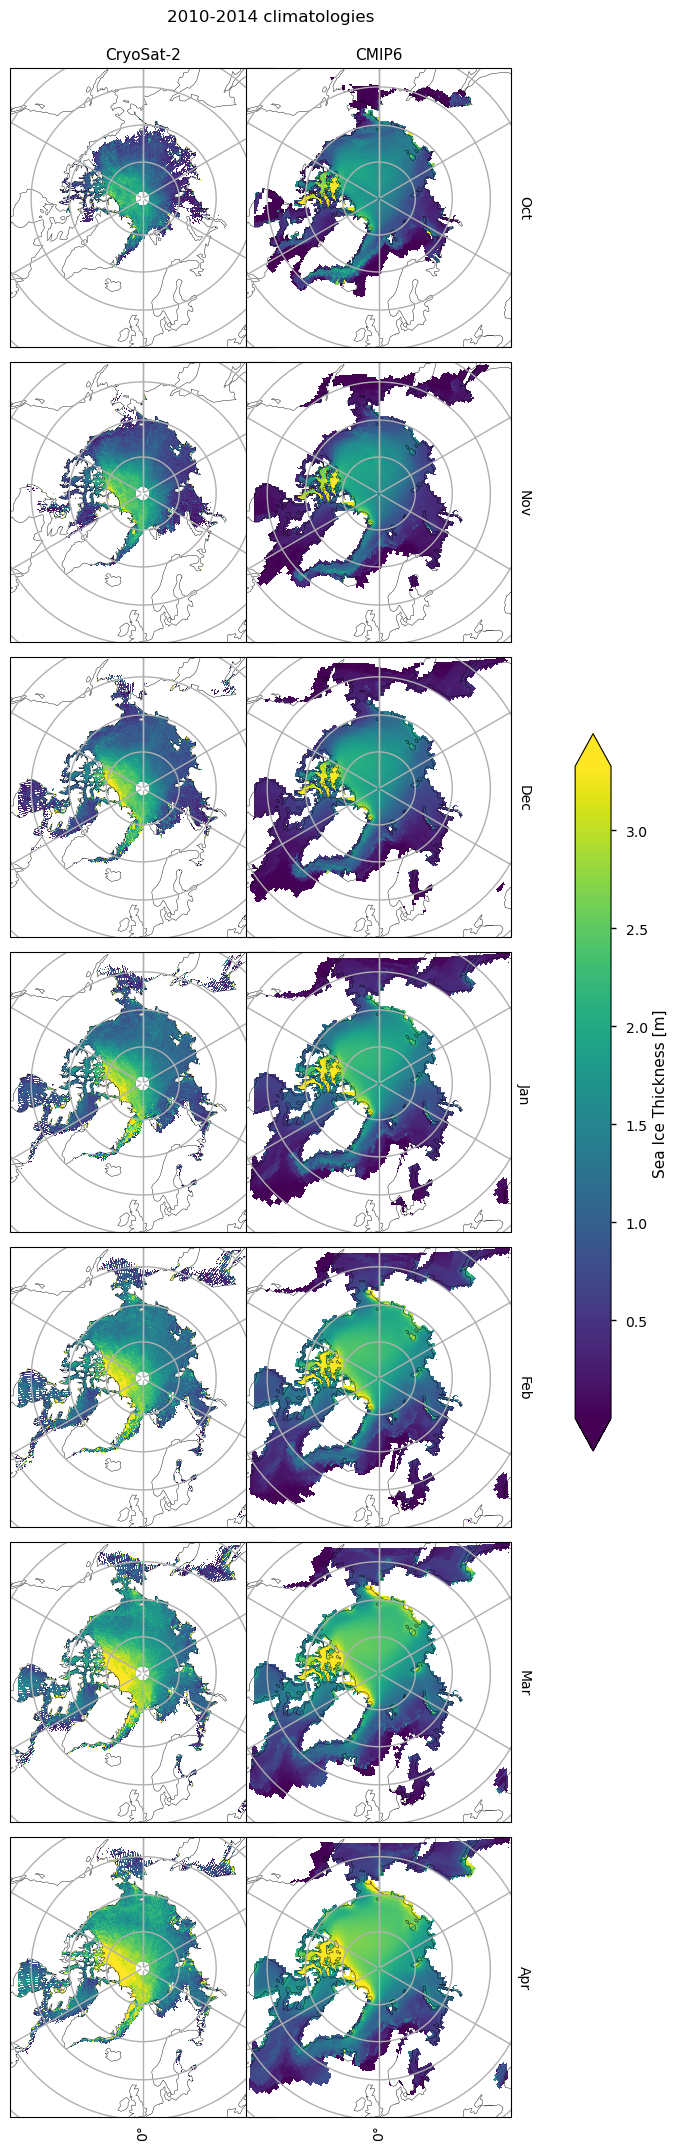

In [13]:
plot_sithick_maps(da_maps, projection_satellite, "cryosat_2", title="2010-2014 climatologies")

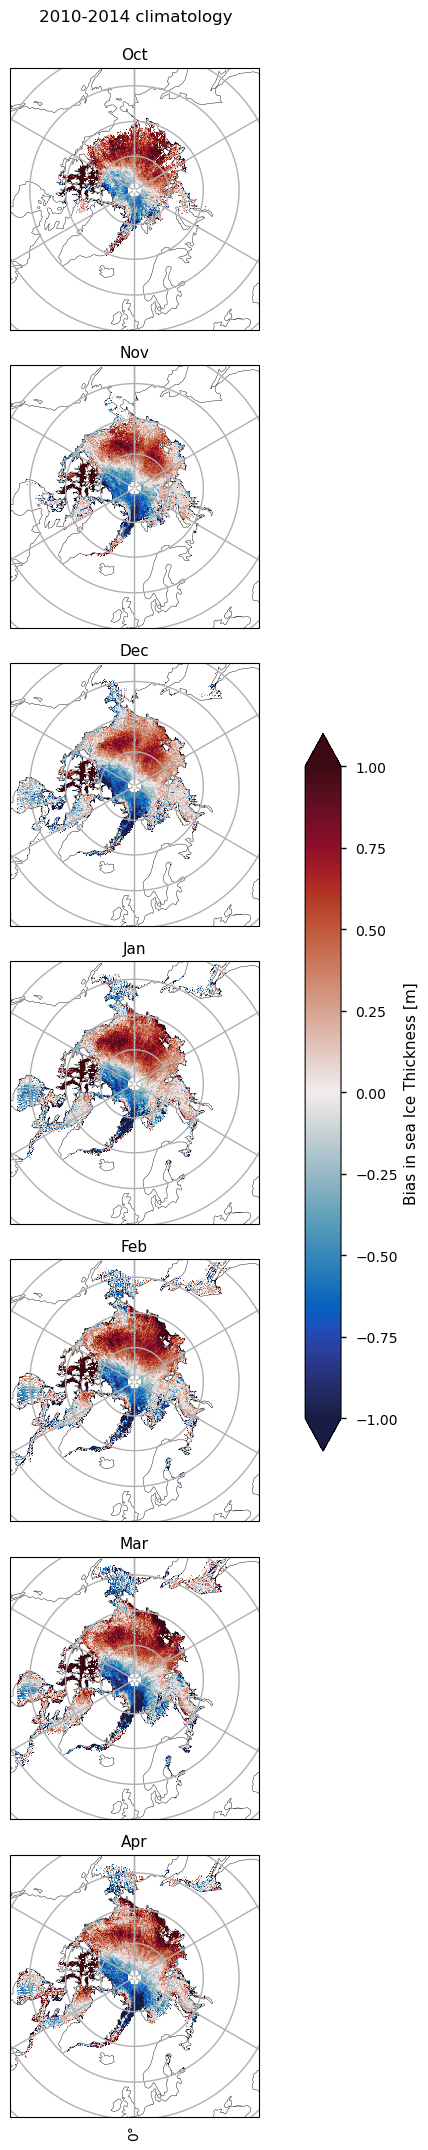

In [14]:
plot_bias_maps(da_maps.sel(satellite="cryosat_2").squeeze(), projection_satellite, title="2010-2014 climatology")

(climate_projections-cmip6_model-performance_q03:section-3.3)=
#### 3.3 Change in thickness over time

Below we compare the differences (later - earlier) in the two climatologies for the ENVISAT period (2002-2010) and the overlap between the CryoSat-2 period and the historical experiment (2010-2024). The satellite products show a general decrease, with the exception of the Beaufort Sea in October, while the CMIP6 models show a near-uniform drop between the two periods. The magnitude of the drop is higher for the satellites however.
If we follow the estimated biases for each satellite, the change in the satellite thickness should drop by about 40cm, since ENVISAT has a larger negative bias than CryoSat-2. Hence we can theoretically trust decreases in the satellite thickness more than increases. However, as mentioned earlier, the validation data which was used to estimate the satellite biases was quite limited spatially [(CDS SIT Quality Assessment Report)](https://dast.copernicus-climate.eu/documents/satellite-sea-ice-thickness/level-3/v3-0/WP2-FDDP-2022-09_C3S2-Lot3_PQAR-of-v3.0-SeaIceThickness-products_v3.2_Final.pdf).

The short length of the time periods makes it difficult to see trends, which is also the conclusion of the notebook about the satellite sea ice thickness data, and the advice in the [CDS SIT Quality Assessment Report](https://dast.copernicus-climate.eu/documents/satellite-sea-ice-thickness/level-3/v3-0/WP2-FDDP-2022-09_C3S2-Lot3_PQAR-of-v3.0-SeaIceThickness-products_v3.2_Final.pdf). This is also why many authors use the PIOMAS reanalysis as a reference sea ice thickness product. [Davy & Outten (2020)](https://doi.org/10.1175/JCLI-D-19-0990.1) found that the CMIP6 ensemble mean had a similar trend to PIOMAS, showing thinning of sea ice and calculated over longer time intervals.

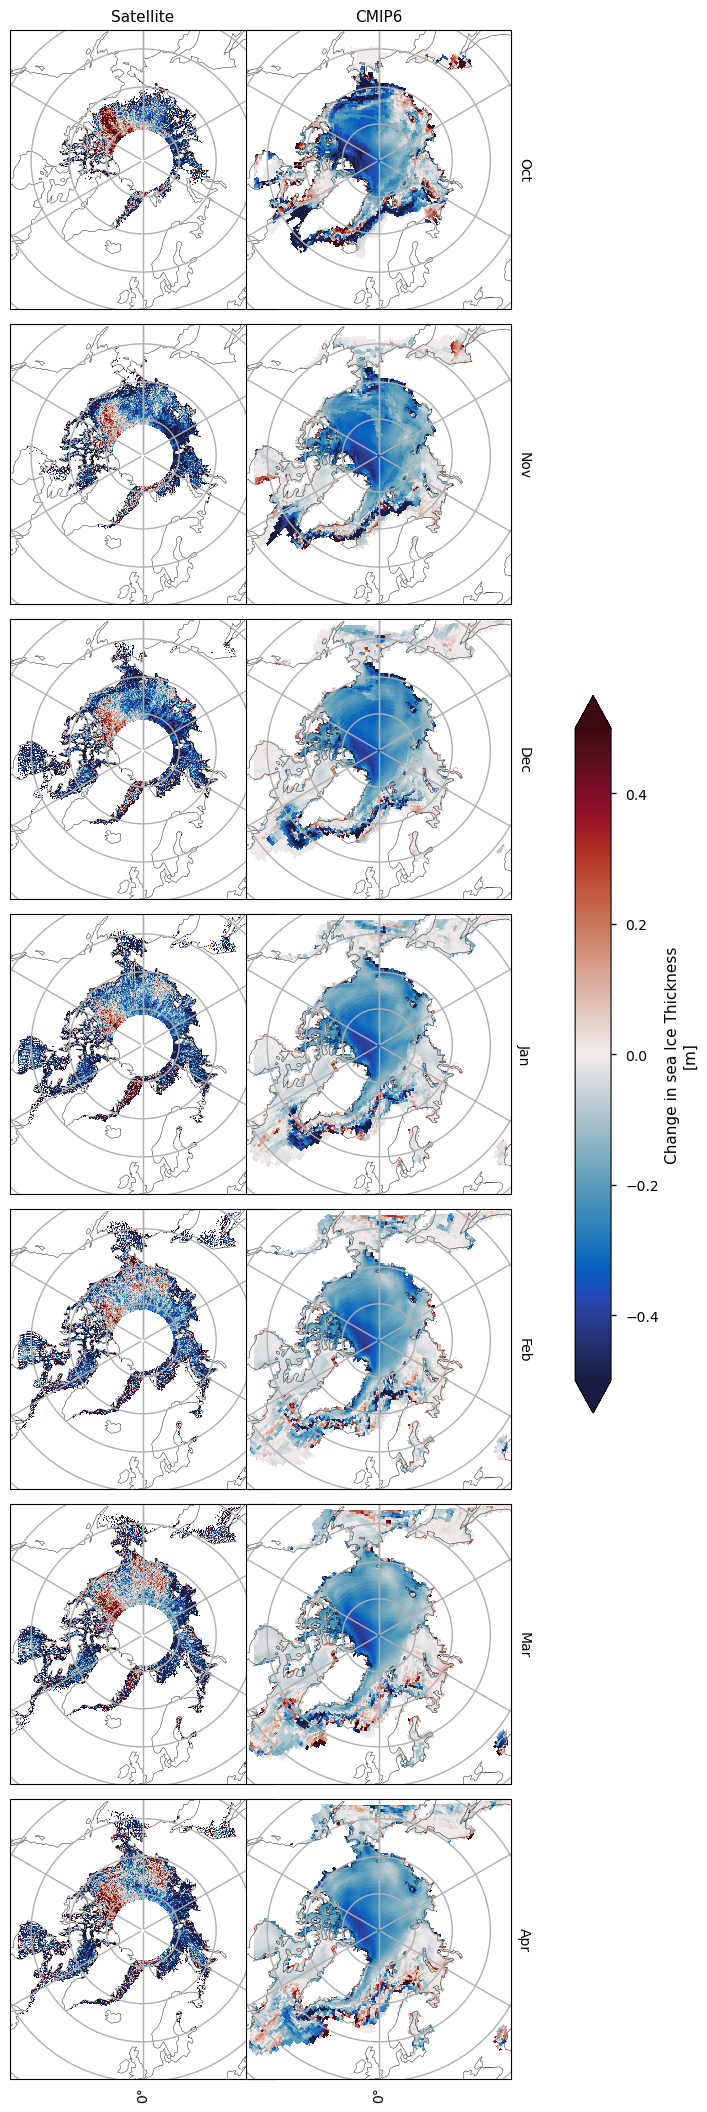

In [15]:
plot_change_maps(da_maps, projection_satellite)

## ℹ️ If you want to know more

### Key resources

Introductory sea ice materials:
- [Role of sea ice in the climate](https://www.epa.gov/climate-indicators/climate-change-indicators-arctic-sea-ice)
- [Observing sea ice with satellites](https://www.metoffice.gov.uk/research/climate/cryosphere-oceans/sea-ice/measure)

Introductory CMIP6 materials:
- [A short introduction to CMIP and CMIP6](https://www.wcrp-climate.org/wgcm-cmip/cmip-video)
- [CMIP6: the next generation of climate models explained](https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained/)

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

1. [CDS Satellite Sea Ice Thickness Product Quality Assessment Report](https://dast.copernicus-climate.eu/documents/satellite-sea-ice-thickness/level-3/v3-0/WP2-FDDP-2022-09_C3S2-Lot3_PQAR-of-v3.0-SeaIceThickness-products_v3.2_Final.pdf)

1. Davy, R., and S. Outten (2020). The Arctic Surface Climate in CMIP6: Status and Developments since CMIP5. J. Climate, 33, 8047–8068, https://doi.org/10.1175/JCLI-D-19-0990.1

1. Henke, M., F. Cassalho, T. Miesse, C. M. Ferreira, J. Zhang and T. M. Ravens (2023). Assessment of Arctic sea ice and surface climate conditions in nine CMIP6 climate models. Arctic, Antarctic, and Alpine Research, 55(1), https://doi.org/10.1080/15230430.2023.2271592

1. Kuang, H. Y., Sun, S. Z., Ye, Y. F., Wang, S. Y., Bi, H. B., Chen, Z. Q., & Cheng, X. (2024). An assessment of the CMIP6 performance in simulating Arctic sea ice volume flux via Fram Strait. Advances in Climate Change Research, 15(4), 584-595, https://doi.org/10.1016/j.accre.2024.06.008

1. Watts, M., W. Maslowski, Y. J. Lee, J. C. Kinney, and R. Osinski (2021). A Spatial Evaluation of Arctic Sea Ice and Regional Limitations in CMIP6 Historical Simulations. J. Climate, 34, 6399–6420, https://doi.org/10.1175/JCLI-D-20-0491.1

1. West, A. E., & Blockley, E. W. (2024). CMIP6 models overestimate sea ice melt, growth & conduction relative to ice mass balance buoy estimates. Geoscientific Model Development Discussions, 2024, 1-33, https://doi.org/10.5194/gmd-2024-121

1. Xu, M., & Li, J. (2023). Assessment of sea ice thickness simulations in the CMIP6 models with CICE components. Frontiers in Marine Science, 10, 1223772, https://doi.org/10.3389/fmars.2023.1223772

1. Zhou, X., Wang, B., & Huang, F. (2022). Evaluating sea ice thickness simulation is critical for projecting a summer ice-free Arctic Ocean. Environmental Research Letters, 17(11), 114033, https://doi.org/10.1088/1748-9326/ac9d4d